Considers the scattering of a soliton in the integrable 1+1 dimensional sine-Gordon model
$$
u_{tt} - u_{xx} + \sin u = 0
$$
on the half line $x<0$ with a typically non-integrable boundary $u_x + 2ku=0$ at $x=0$.

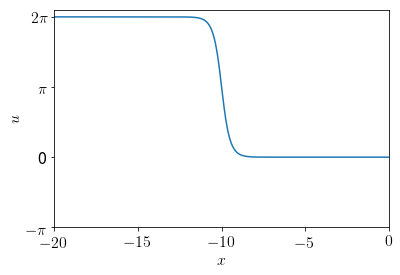

In [1]:
import numpy as np
from SolitonScattering import SG
dt, dx = 0.02, 0.025
xLim = [-20,0]

x = np.linspace(xLim[0],xLim[1],int((xLim[1] - xLim[0])/dx) + 1)

### Start with an antikink with initial velocity v0 and position x0
v0, k = .95, .145
x0 = -10
state = SG.kink(x,0,v0,x0,epsilon=-1)
field = SG.SineGordon(timeStepFunc='eulerRobin', state=state)
field.show(useTex=True)

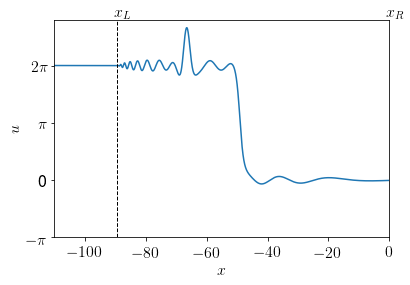

In [2]:
### Time evolve the collision of the antikink with the Robin boundary u_x+2ku=0 to t=100
field.time_evolve(100, dt=dt, k=.145, dirichletValue=2*np.pi, dynamicRange=True, progressBar=False)
field.show(useTex=True, showLims=True)

The solitons contained in the reflected field correspond to the bound state eigenvalues of a linear scattering problem associated with the inverse scattering method.
$$
	V(u,u_x,u_t;\lambda) = 
	\left(
	\begin{array}{cc}
		-\frac{i(u_x+u_t)}{4} & \lambda - \frac{e^{-iu}}{16\lambda} \\
		\frac{e^{iu}}{16\lambda} - \lambda & \frac{i(u_x+u_t)}{4}
	\end{array}
	\right).
$$


In [3]:
### Find the bound state eigenvalues of the associated linear scattering problem which encode the solitons in the reflected field
vRange = [-0.95, 0]
eigenvalues = field.boundStateEigenvalues(vRange)
print(eigenvalues)

     Type     |           Eigenvalues           |  Velocity  | Frequency |  Energy  
------------------------------------------------------------------------------------
   Breather   | ±0.562170232438 +0.313238338398i| -0.737755  | 0.873549  |11.536294 
   Antikink   |  0.000000000000 +0.470862125178i| -0.560186  | 0.000000  | 9.657558 


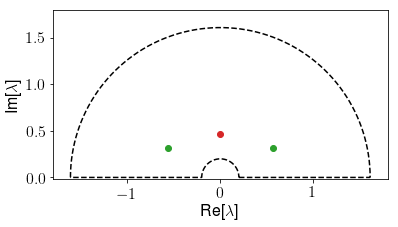

In [5]:
eigenvalues.show()